In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2
%load_ext pyinstrument

import sys
sys.path.insert(0,'..')


In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from src.baseline.coa_model import load_model,plot_attention,get_training_mean_std,init_testing_model, get_caps_from, predict_image
import torch
from src.baseline.vocabulary import Vocabulary


In [58]:
data_location = '/home/space/datasets/COA/generated-data-api-single-and-plural/'
root_folder_images = data_location + '/res_images/'
image_path = root_folder_images + '/image_940.png'
test_caption_file = data_location + '/test_captions_psumsq.txt'

problem_img = Image.open(img_location).convert("RGB")

# print(problem_img.shape)
plt.imshow(problem_img)
plt.show()


NameError: name 'img_location' is not defined

In [50]:
import torchvision.transforms as T

trans = T.Compose([
    T.Resize(226),                     
    T.RandomCrop(224),                 
    T.ToTensor(),                               
    T.Normalize(mean, std) 
])

trans = T.ToTensor()
img_t = trans(problem_img)
img_t.shape

torch.Size([3, 100, 100])

In [13]:

# Hyperparams

embed_size=300
vocab_size = 36
attention_dim=256
encoder_dim=512  ### resnet34 & resnet18
decoder_dim=512
learning_rate = 3e-4
drop_prob=0.3
ignored_idx = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# BATCH_SIZE = 5
NUM_WORKER = 2 #### this needs multi-core
freq_threshold = 5
batch_size = 1

# 30 minutes to create those, as it's baseline, i ran it several times and it's the same
vocab = Vocabulary(freq_threshold)
vocab.stoi = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3, 'lion': 4, 'rampant': 5, 'passt': 6, 'guard': 7, 'head': 8, 'lions': 9, 'cross': 10, 'moline': 11, 'patonce': 12, 'eagle': 13, 'doubleheaded': 14, 'eagles': 15, 'a': 16, 'b': 17, 'o': 18, 's': 19, 'g': 20, 'e': 21, 'v': 22, '1': 23, '2': 24, '3': 25, '4': 26, '5': 27, '6': 28, '7': 29, '8': 30, '9': 31, '10': 32, '11': 33, 'border': 34, '&': 35}
vocab.itos = {0: '<PAD>', 1: '<SOS>', 2: '<EOS>', 3: '<UNK>', 4: 'lion', 5: 'rampant', 6: 'passt', 7: 'guard', 8: 'head', 9: 'lions', 10: 'cross', 11: 'moline', 12: 'patonce', 13: 'eagle', 14: 'doubleheaded', 15: 'eagles', 16: 'a', 17: 'b', 18: 'o', 19: 's', 20: 'g', 21: 'e', 22: 'v', 23: '1', 24: '2', 25: '3', 26: '4', 27: '5', 28: '6', 29: '7', 30: '8', 31: '9', 32: '10', 33: '11', 34: 'border', 35: '&'}


hyper_params = {'embed_size': embed_size,
                'attention_dim': attention_dim,
                'encoder_dim': encoder_dim,
                'decoder_dim': decoder_dim,
                'vocab_size': vocab_size
              }


EXP_FOLDER_PATH = '/home/space/datasets/COA/experiments/' 
run_path   = EXP_FOLDER_PATH + 'run-09-26-2022-11:55:29/'
model_file = 'baseline-model-09-26-2022-12:02:27.pth'

run_path

'/home/space/datasets/COA/experiments/run-09-26-2022-11:55:29/'

In [14]:

model, optimizer, loss, criterion = load_model(run_path+model_file, 
                                    hyper_params, 
                                    learning_rate,
                                    drop_prob, 
                                    ignored_idx,
                                    pretrained=True)


model

EncoderDecoder(
  (encoder): EncoderCNN(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, 

In [15]:
mean, std = get_training_mean_std(run_path)
mean

mean=0.011504699476063251, std=0.08723288774490356


tensor(0.0115)

In [16]:
test_loader, test_dataset = init_testing_model(test_caption_file, 
                                               root_folder_images, 
                                               mean, std,
                                               NUM_WORKER,
                                               vocab,
                                               batch_size, 
                                               device, 
                                               pin_memory=False)
test_loader

In [17]:
problem_img.shape

torch.Size([100, 100, 4])

In [51]:
img_t.unsqueeze(0).shape

torch.Size([1, 3, 100, 100])

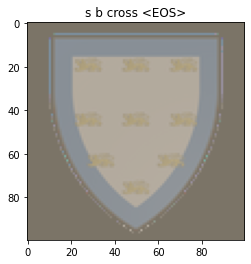

(['s', 'b', 'cross', '<EOS>'],
 [array([[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
          0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625]],
        dtype=float32),
  array([[0.06187879, 0.04478607, 0.0496937 , 0.07531607, 0.04122118,
          0.03730742, 0.04063106, 0.05686457, 0.0367525 , 0.03578689,
          0.03990047, 0.05951755, 0.05116389, 0.04476916, 0.0606529 ,
          0.26375782]], dtype=float32),
  array([[0.06413142, 0.05828461, 0.05860398, 0.06093501, 0.05627972,
          0.05690568, 0.05974992, 0.06131566, 0.05790553, 0.05793326,
          0.05833821, 0.06665356, 0.05855661, 0.06403877, 0.07122353,
          0.08914454]], dtype=float32),
  array([[0.06537022, 0.05945706, 0.05977293, 0.06186425, 0.05635006,
          0.05541193, 0.05901383, 0.06004809, 0.05792817, 0.05876962,
          0.05893802, 0.06475272, 0.05713067, 0.0614735 , 0.07239509,
          0.09132382]], dtype=float32)])

In [55]:

img = img_t.detach().clone()
img1 = img_t.detach().clone()
# img.unsqueeze(0): torch.Size([1, 3, 224, 224])
caps,alphas = get_caps_from(model, test_dataset, img.unsqueeze(0),device)
caps,alphas


In [64]:
features_tensor = img_t.detach().clone().unsqueeze(0)
features = model.encoder(features_tensor.to(device))

# predict the caption from the image
caps,_ = model.decoder.generate_caption(features, vocab=test_dataset.vocab)   
caps = caps[:-1]
predicted_caption = ' '.join(caps)

predicted_caption

's b cross'

In [ ]:
plot_attention(img1, caps, alphas)